In [1]:
# Importing tensorflow version 2

%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

In [0]:
# Importing other important packages

import numpy as np
import pandas as pd

# Transfer Learning MNIST

* Train a simple convnet (convolutional neural network) on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Shape of X_train:", X_train.shape, "\nShape of y_train:", y_train.shape, 
      "\nShape of X_test:", X_test.shape, "\nShape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28) 
Shape of y_train: (60000,) 
Shape of X_test: (10000, 28, 28) 
Shape of y_test: (10000,)


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


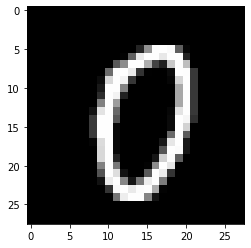

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
# 1st dataset
X_train_0to4 = X_train[y_train < 5]
y_train_0to4 = y_train[y_train < 5]

X_train_5to9 = X_train[y_train > 4]
y_train_5to9 = y_train[y_train > 4]

# 2nd dataset
X_test_0to4 = X_test[y_test < 5]
y_test_0to4 = y_test[y_test < 5]

X_test_5to9 = X_test[y_test > 4]
y_test_5to9 = y_test[y_test > 4]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [8]:
print("Shape of X_train_0to4:", X_train_0to4.shape, "\nShape of y_train_0to4:", y_train_0to4.shape,
      "\nShape of X_train_5to9:", X_train_5to9.shape, "\nShape of y_train_5to9:", y_train_5to9.shape,
      "\n\nShape of X_test_0to4:", X_test_0to4.shape, "\nShape of y_test_0to4:", y_test_0to4.shape,
      "\nShape of X_test_5to9:", X_test_5to9.shape, "\nShape of y_test_5to9:", y_test_5to9.shape)

Shape of X_train_0to4: (30596, 28, 28) 
Shape of y_train_0to4: (30596,) 
Shape of X_train_5to9: (29404, 28, 28) 
Shape of y_train_5to9: (29404,) 

Shape of X_test_0to4: (5139, 28, 28) 
Shape of y_test_0to4: (5139,) 
Shape of X_test_5to9: (4861, 28, 28) 
Shape of y_test_5to9: (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
# Reshaping the first dataset

X_train_0to4 = X_train_0to4.reshape(len(X_train_0to4), 28, 28, 1)
X_test_0to4 = X_test_0to4.reshape(len(X_test_0to4), 28, 28, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
# Normalizing the first dataset

X_train_0to4 = X_train_0to4 / 255
X_test_0to4 = X_test_0to4 / 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [11]:
print("Shape of X_train_0to4:", X_train_0to4.shape, "\nShape of y_train_0to4:", y_train_0to4.shape,
      "\nShape of X_test_0to4:", X_test_0to4.shape, "\nShape of y_test_0to4:", y_test_0to4.shape)

Shape of X_train_0to4: (30596, 28, 28, 1) 
Shape of y_train_0to4: (30596,) 
Shape of X_test_0to4: (5139, 28, 28, 1) 
Shape of y_test_0to4: (5139,)


In [12]:
print("Number of images in X_train_0to4 are ", X_train_0to4.shape[0],
      "\nNumber of images in X_test_0to4 are ", X_test_0to4.shape[0])

Number of images in X_train_0to4 are  30596 
Number of images in X_test_0to4 are  5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
# Converting the target column to 5 categorical classes

y_train_0to4 =  tensorflow.keras.utils.to_categorical(y_train_0to4, num_classes = 5)
y_test_0to4 =  tensorflow.keras.utils.to_categorical(y_test_0to4, num_classes = 5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
# Clear out tensorflow memory
tensorflow.keras.backend.clear_session()

# Define Model
model = tensorflow.keras.models.Sequential()

# 1st Conv Layer
model.add(tensorflow.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))

# Max Pooling layer
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size = (2,2)))

# 2nd Conv Layer
model.add(tensorflow.keras.layers.Conv2D(64, (3,3), activation='relu'))

# Max Pooling layer
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout
model.add(tensorflow.keras.layers.Dropout(rate = 0.2))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
# Flattening the data
model.add(tensorflow.keras.layers.Flatten())

# 1st dense layer
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))

# Dropout
model.add(tensorflow.keras.layers.Dropout(rate = 0.3))

# Output layer
model.add(tensorflow.keras.layers.Dense(5, activation = 'softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [16]:
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training the model
model_0to4 = model.fit(X_train_0to4, y_train_0to4, batch_size=128, epochs=10, validation_data=(X_test_0to4, y_test_0to4))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 4s 129us/sample - loss: 0.9255 - accuracy: 0.7119 - val_loss: 0.1995 - val_accuracy: 0.9558
Epoch 2/10
30596/30596 [==============================] - 1s 43us/sample - loss: 0.2483 - accuracy: 0.9228 - val_loss: 0.2656 - val_accuracy: 0.8969
Epoch 3/10
30596/30596 [==============================] - 1s 42us/sample - loss: 0.1858 - accuracy: 0.9417 - val_loss: 0.0962 - val_accuracy: 0.9710
Epoch 4/10
30596/30596 [==============================] - 1s 43us/sample - loss: 0.1557 - accuracy: 0.9513 - val_loss: 0.0752 - val_accuracy: 0.9782
Epoch 5/10
30596/30596 [==============================] - 1s 43us/sample - loss: 0.1367 - accuracy: 0.9573 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 6/10
30596/30596 [==============================] - 1s 43us/sample - loss: 0.1230 - accuracy: 0.9609 - val_loss: 0.0601 - val_accuracy: 0.9817
Epoch 7/10
30596/30596 [==============================] 

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [17]:
from sklearn.metrics import accuracy_score

y_pred1 = model.predict(X_test_0to4)
y_pred2 = model.predict(X_train_0to4)

# Finding the accuracy:

accuracy2 = accuracy_score(y_train_0to4.argmax(axis=1), y_pred2.argmax(axis=1))
print("The accuracy of train data is", round(accuracy2*100, 2))

accuracy1 = accuracy_score(y_test_0to4.argmax(axis=1), y_pred1.argmax(axis=1))
print("The accuracy of test data is", round(accuracy1*100, 2))

The accuracy of train data is 98.09
The accuracy of test data is 98.68


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
# Freezing layers in the model which don't have 'dense' in their name

for layer in model.layers:
  if('dense' not in layer.name): # Prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
# Modifying the second dataset

y_train_5to9 = y_train_5to9 - 5
y_test_5to9 = y_test_5to9 - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
# Reshaping the second dataset

X_train_5to9 = X_train_5to9.reshape(len(X_train_5to9), 28, 28, 1)
X_test_5to9 = X_test_5to9.reshape(len(X_test_5to9), 28, 28, 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
# Normalizing the second dataset

X_train_5to9 = X_train_5to9 / 255
X_test_5to9 = X_test_5to9 / 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [22]:
print("Shape of X_train_5to9:", X_train_5to9.shape, "\nShape of y_train_5to9:", y_train_5to9.shape,
      "\nShape of X_test_5to9:", X_test_5to9.shape, "\nShape of y_test_5to9:", y_test_5to9.shape)

Shape of X_train_5to9: (29404, 28, 28, 1) 
Shape of y_train_5to9: (29404,) 
Shape of X_test_5to9: (4861, 28, 28, 1) 
Shape of y_test_5to9: (4861,)


In [23]:
print("Number of images in X_train_5to9 are ", X_train_5to9.shape[0],
      "\nNumber of images in X_test_5to9 are ", X_test_5to9.shape[0])

Number of images in X_train_5to9 are  29404 
Number of images in X_test_5to9 are  4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
# Converting the target column to 5 categorical classes

y_train_5to9 =  tensorflow.keras.utils.to_categorical(y_train_5to9, num_classes = 5)
y_test_5to9 =  tensorflow.keras.utils.to_categorical(y_test_5to9, num_classes = 5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [25]:
# Training the model

model_5to9 = model.fit(X_train_5to9, y_train_5to9, batch_size=128, epochs=10, validation_data=(X_test_5to9, y_test_5to9))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 1s 48us/sample - loss: 0.6341 - accuracy: 0.7874 - val_loss: 0.2427 - val_accuracy: 0.9280
Epoch 2/10
29404/29404 [==============================] - 1s 43us/sample - loss: 0.2847 - accuracy: 0.9089 - val_loss: 0.1589 - val_accuracy: 0.9475
Epoch 3/10
29404/29404 [==============================] - 1s 42us/sample - loss: 0.2066 - accuracy: 0.9344 - val_loss: 0.1272 - val_accuracy: 0.9574
Epoch 4/10
29404/29404 [==============================] - 1s 43us/sample - loss: 0.1784 - accuracy: 0.9419 - val_loss: 0.1066 - val_accuracy: 0.9638
Epoch 5/10
29404/29404 [==============================] - 1s 42us/sample - loss: 0.1548 - accuracy: 0.9520 - val_loss: 0.0901 - val_accuracy: 0.9696
Epoch 6/10
29404/29404 [==============================] - 1s 43us/sample - loss: 0.1394 - accuracy: 0.9548 - val_loss: 0.0814 - val_accuracy: 0.9724
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [26]:
y_pred3 = model.predict(X_test_5to9)
y_pred4 = model.predict(X_train_5to9)

# Finding the accuracy:

accuracy2 = accuracy_score(y_train_5to9.argmax(axis=1), y_pred4.argmax(axis=1))
print("The accuracy of train data is", round(accuracy2*100, 2))

accuracy1 = accuracy_score(y_test_5to9.argmax(axis=1), y_pred3.argmax(axis=1))
print("The accuracy of test data is", round(accuracy1*100, 2))

The accuracy of train data is 97.91
The accuracy of test data is 98.07


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [27]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
tweets_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/tweets.csv', encoding = 'latin')
tweets_df.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [29]:
# Checking if there are any null values
tweets_df.isnull().any()

tweet_text                                             True
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

In [30]:
# Dropping null values
tweets_df = tweets_df.dropna()

# Shape after dropping null values
tweets_df.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [31]:
# First 5 rows of 'tweets' dataset 
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
# Importing regular expression package
import re as re

# Preprocessing the data
tweets_df = tweets_df.applymap(lambda s: s.lower())
tweets_df = tweets_df.applymap(lambda s: re.sub('[^0-9a-z #+_]', " ", s))
tweets_df = tweets_df.applymap(lambda s: s.strip())

print dataframe

In [33]:
tweets_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iphone,positive emotion
9079,quot papyrus sort of like the ipad quot n...,ipad,positive emotion
9080,diller says google tv quot might be run over ...,other google product or service,negative emotion
9085,i ve always used camera+ for my iphone b c it ...,ipad or iphone app,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [34]:
tweets_df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [35]:
tweets_df.groupby("is_there_an_emotion_directed_at_a_brand_or_product").count()

,tweet_text,emotion_in_tweet_is_directed_at
is_there_an_emotion_directed_at_a_brand_or_product,,
i can t tell,9,9
negative emotion,519,519
no emotion toward brand or product,91,91
positive emotion,2672,2672


In [36]:
# As the data is having mostly 'positive emotion' and 'negative emotion', we neglect the other two categories

tweets_df = tweets_df[(tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') |
                      (tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]
tweets_df.shape

(3191, 3)

In [37]:
# Finding the value counts of "positive emotion" and "negative emotion"

tweets_df.groupby("is_there_an_emotion_directed_at_a_brand_or_product").count()

,tweet_text,emotion_in_tweet_is_directed_at
is_there_an_emotion_directed_at_a_brand_or_product,,
negative emotion,519,519
positive emotion,2672,2672


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [38]:
# Encoding labels

tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'negative emotion' : 0, 
                                                                                                                                       'positive emotion' : 1})
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array([0, 1])

In [39]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,0
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they...,ipad,1
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = tweets_df['tweet_text'] # Feature
Y = tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] # Label / Target

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
# Splitting into train and test datasets

from sklearn.model_selection import train_test_split
X_train_T, X_test_T, Y_train_T, Y_test_T = train_test_split(X, Y, test_size = 0.25, random_state = 47)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# Vectorizing the data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
X_train_Vect = vectorizer.fit_transform(X_train_T)
X_test_Vect = vectorizer.transform(X_test_T)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [0]:
model_LR = LR.fit(X_train_Vect, Y_train_T)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
MultNB = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [0]:
model_MultNB = MultNB.fit(X_train_Vect, Y_train_T)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
Y_pred_LR = model_LR.predict(X_test_Vect)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
Y_pred_MultNB = model_MultNB.predict(X_test_Vect)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [49]:
accuracy_LR = accuracy_score(Y_test_T, Y_pred_LR)
print("The accuracy of Logistic Regression data is", round(accuracy_LR*100, 2))

The accuracy of Logistic Regression data is 87.59


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [50]:
accuracy_MultNB = accuracy_score(Y_test_T, Y_pred_MultNB)
print("The accuracy of Logistic Regression data is", round(accuracy_MultNB*100, 2))

The accuracy of Logistic Regression data is 87.84
